In [2]:
#Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from sklearn.datasets import make_blobs, make_moons, make_circles, make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import svm 
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing

In [3]:
#initialize the classifiers
names = ["SVM", "Random Forest", "KNN" ]
classifiers = [
          svm.SVC(kernel='linear'), 
          RandomForestClassifier(n_estimators=50, random_state=1, max_features = 'sqrt'),
          KNeighborsClassifier(n_neighbors=3)]

In [4]:
#function to calculate the accuracy 
def fit_predict(train_data, test_data, train_label , test_label):
    accuracies = []
    for name, model in zip(names, classifiers):
        
        model.fit(train_data, train_label)
        score = model.score(test_data, test_label)
        accuracies.append(score)
    
    SVM_acc = accuracies[0]
    RF_acc = accuracies[1]
    KNN_acc = accuracies[2]

    return SVM_acc,RF_acc,KNN_acc

In [5]:
#function for taking input data, sampling noise and appending it
def add_noise(data, mu, var, dim):
    n = data.shape[0]
    noise = np.random.normal(mu, var, size = [n, dim])
    data = np.concatenate([data,noise],axis = 1)
    return data

In [6]:
#Function to split the data into training & testing and then calculate the accuracies respectively
def split_accuracy(train_data, train_label, size):
    X_train, X_test, y_train, y_test = train_test_split(train_data, train_label, test_size=size)
    svm_acc, rf_acc, knn_acc = fit_predict(X_train, X_test, y_train, y_test)
    return svm_acc,rf_acc, knn_acc

In [12]:
noise_dims = np.geomspace(1, 1500, 8, dtype=int) #define the number of noise dimensions
size = 0.2 
n_sims = 2
n_dims = []
var_val = [0.1, 1, 10]

#list to store the RF, SVM and KNN accurary for the 3 different datasets and 3 variances
rf_acc1_v1, rf_acc2_v1, rf_acc3_v1, svm_acc1_v1, svm_acc2_v1, svm_acc3_v1,knn_acc1_v1, knn_acc2_v1, knn_acc3_v1 = ([] for l in range(9))

rf_acc1_v2, rf_acc2_v2, rf_acc3_v2,svm_acc1_v2, svm_acc2_v2, svm_acc3_v2,knn_acc1_v2, knn_acc2_v2, knn_acc3_v2 = ([] for l in range(9))

rf_acc1_v3, rf_acc2_v3, rf_acc3_v3,svm_acc1_v3, svm_acc2_v3, svm_acc3_v3,knn_acc1_v3, knn_acc2_v3, knn_acc3_v3 = ([] for l in range(9))

#List of average values across 'n_sims' trials for the individual accuracies.
mean_r_a1_v1, mean_r_a2_v1, mean_r_a3_v1, mean_s_a1_v1, mean_s_a2_v1, mean_s_a3_v1, mean_k_a1_v1, mean_k_a2_v1, mean_k_a3_v1 = ([] for l in range(9))

mean_r_a1_v2, mean_r_a2_v2, mean_r_a3_v2, mean_s_a1_v2, mean_s_a2_v2, mean_s_a3_v2, mean_k_a1_v2, mean_k_a2_v2, mean_k_a3_v2 = ([] for l in range(9))

mean_r_a1_v3, mean_r_a2_v3, mean_r_a3_v3, mean_s_a1_v3, mean_s_a2_v3, mean_s_a3_v3, mean_k_a1_v3, mean_k_a2_v3, mean_k_a3_v3 = ([] for l in range(9))

scaler = preprocessing.StandardScaler()        


for d in noise_dims:
    t_r_acc1_v1, t_s_acc1_v1, t_k_acc1_v1, t_r_acc1_v2, t_s_acc1_v2, t_k_acc1_v2,t_r_acc1_v3, t_s_acc1_v3, t_k_acc1_v3 = ([] for l in range(9))
    
    t_r_acc2_v1, t_s_acc2_v1, t_k_acc2_v1, t_r_acc2_v2, t_s_acc2_v2, t_k_acc2_v2,t_r_acc2_v3, t_s_acc2_v3, t_k_acc2_v3 = ([] for l in range(9))
    
    t_r_acc3_v1, t_s_acc3_v1, t_k_acc3_v1, t_r_acc3_v2, t_s_acc3_v2, t_k_acc3_v2,t_r_acc3_v3, t_s_acc3_v3, t_k_acc3_v3 = ([] for l in range(9))
     
    for s in range(n_sims):
        #define three datasets and normalize the variance
        X1,Y1 = make_classification(n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1)
        X1 = scaler.fit_transform(X1)
        X2,Y2 = make_moons(noise=0.3) 
        X2 = scaler.fit_transform(X2)
        X3,Y3 = make_circles(noise=0.2, factor=0.5)
        X3 = scaler.fit_transform(X3)
        
        #accuracy for the 1st dataset with 3 variance values
        acc_svm1_v1, acc_rf1_v1, acc_knn1_v1 = split_accuracy(add_noise(X1, 0, var_val[0], d), Y1, size)
        acc_svm1_v2, acc_rf1_v2, acc_knn1_v2 = split_accuracy(add_noise(X1, 0, var_val[1], d), Y1, size)
        acc_svm1_v3, acc_rf1_v3, acc_knn1_v3 = split_accuracy(add_noise(X1, 0, var_val[2], d), Y1, size)
        
        #accuracy for the 2nd dataset with 3 variance values
        acc_svm2_v1, acc_rf2_v1, acc_knn2_v1 = split_accuracy(add_noise(X2, 0, var_val[0], d), Y2, size)
        acc_svm2_v2, acc_rf2_v2, acc_knn2_v2 = split_accuracy(add_noise(X2, 0, var_val[1], d), Y2, size)
        acc_svm2_v3, acc_rf2_v3, acc_knn2_v3 = split_accuracy(add_noise(X2, 0, var_val[2], d), Y2, size)
        
        #accuracy for the 3rd dataset with 3 variance values
        acc_svm3_v1, acc_rf3_v1, acc_knn3_v1 = split_accuracy(add_noise(X3, 0, var_val[0], d), Y3, size)
        acc_svm3_v2, acc_rf3_v2, acc_knn3_v2 = split_accuracy(add_noise(X3, 0, var_val[1], d), Y3, size)
        acc_svm3_v3, acc_rf3_v3, acc_knn3_v3 = split_accuracy(add_noise(X3, 0, var_val[2], d), Y3, size)
        
        #temp to append the accuracies across trails
        #first variance value 1st dataset
        t_s_acc1_v1.append(acc_svm1_v1)
        t_r_acc1_v1.append(acc_rf1_v1)
        t_k_acc1_v1.append(acc_knn1_v1)
        #second var val 1st dataset
        t_s_acc1_v2.append(acc_svm1_v2)
        t_r_acc1_v2.append(acc_rf1_v2)
        t_k_acc1_v2.append(acc_knn1_v2)
        #3rd var val 1st dataset
        t_s_acc1_v3.append(acc_svm1_v3)
        t_r_acc1_v3.append(acc_rf1_v3)
        t_k_acc1_v3.append(acc_knn1_v3)
        
        
        
        #temp to append the accuracies across trails
        #first variance value 2nd dataset
        t_s_acc2_v1.append(acc_svm2_v1)
        t_r_acc2_v1.append(acc_rf2_v1)
        t_k_acc2_v1.append(acc_knn2_v1)
        #second var val 2nd dataset
        t_s_acc2_v2.append(acc_svm2_v2)
        t_r_acc2_v2.append(acc_rf2_v2)
        t_k_acc2_v2.append(acc_knn2_v2)
        #3rd var val 2nd dataset
        t_s_acc2_v3.append(acc_svm2_v3)
        t_r_acc2_v3.append(acc_rf2_v3)
        t_k_acc2_v3.append(acc_knn2_v3)
        
        
        #temp to append the accuracies across trails
        #first variance value 3rd dataset
        t_s_acc2_v1.append(acc_svm2_v1)
        t_r_acc2_v1.append(acc_rf2_v1)
        t_k_acc2_v1.append(acc_knn2_v1)
        #second var val 3rd dataset
        t_s_acc2_v2.append(acc_svm2_v2)
        t_r_acc2_v2.append(acc_rf2_v2)
        t_k_acc2_v2.append(acc_knn2_v2)
        #3rd var val 3rd dataset
        t_s_acc2_v3.append(acc_svm2_v3)
        t_r_acc2_v3.append(acc_rf2_v3)
        t_k_acc2_v3.append(acc_knn2_v3)
        
        n_dims.append(d)
    #rf accuracy 3 var val and 1st dataset    
    rf_acc1_v1 += t_r_acc1_v1
    rf_acc1_v2 += t_r_acc1_v2
    rf_acc1_v3 += t_r_acc1_v3
    #rf accuracy 3 var val and 2nd dataset    
    rf_acc2_v1 += t_r_acc2_v1
    rf_acc2_v2 += t_r_acc2_v2
    rf_acc2_v3 += t_r_acc2_v3
    #rf accuracy 3 var val and 3rd dataset    
    rf_acc3_v1 += t_r_acc3_v1
    rf_acc3_v2 += t_r_acc3_v2
    rf_acc3_v3 += t_r_acc3_v3
    
    
    #svm accuracy 3 var val and 1st dataset    
    svm_acc1_v1 += t_s_acc1_v1
    svm_acc1_v2 += t_s_acc1_v2
    svm_acc1_v3 += t_s_acc1_v3
    #svm accuracy 3 var val and 2nd dataset    
    svm_acc2_v1 += t_s_acc2_v1
    svm_acc2_v2 += t_s_acc2_v2
    svm_acc2_v3 += t_s_acc2_v3
    #svm accuracy 3 var val and 3rd dataset    
    svm_acc3_v1 += t_s_acc3_v1
    svm_acc3_v2 += t_s_acc3_v2
    svm_acc3_v3 += t_s_acc3_v3
    
    #knn accuracy 3 var val and 1st dataset    
    knn_acc1_v1 += t_k_acc1_v1
    knn_acc1_v2 += t_k_acc1_v2
    knn_acc1_v3 += t_k_acc1_v3
    #knn accuracy 3 var val and 2nd dataset    
    knn_acc2_v1 += t_k_acc2_v1
    knn_acc2_v2 += t_k_acc2_v2
    knn_acc2_v3 += t_k_acc2_v3
    #knn accuracy 3 var val and 3rd dataset    
    knn_acc3_v1 += t_k_acc3_v1
    knn_acc3_v2 += t_k_acc3_v2
    knn_acc3_v3 += t_k_acc3_v3
    
    #means for rf across datasets
    mean_r_a1_v1.append(np.mean(t_r_acc1_v1))
    mean_r_a1_v2.append(np.mean(t_r_acc1_v2))
    mean_r_a1_v3.append(np.mean(t_r_acc1_v3))
    
    mean_r_a2_v1.append(np.mean(t_r_acc2_v1))
    mean_r_a2_v2.append(np.mean(t_r_acc2_v2))
    mean_r_a2_v3.append(np.mean(t_r_acc2_v3))
    
    mean_r_a3_v1.append(np.mean(t_r_acc3_v1))
    mean_r_a3_v2.append(np.mean(t_r_acc3_v2))
    mean_r_a3_v3.append(np.mean(t_r_acc3_v3))
    
    #mean svm across dataset 
    mean_s_a1_v1.append(np.mean(t_s_acc1_v1))
    mean_s_a1_v2.append(np.mean(t_s_acc1_v2))
    mean_s_a1_v3.append(np.mean(t_s_acc1_v3))
    
    mean_s_a2_v1.append(np.mean(t_s_acc2_v1))
    mean_s_a2_v2.append(np.mean(t_s_acc2_v2))
    mean_s_a2_v3.append(np.mean(t_s_acc2_v3))
    
    mean_s_a3_v1.append(np.mean(t_s_acc3_v1))
    mean_s_a3_v2.append(np.mean(t_s_acc3_v2))
    mean_s_a3_v3.append(np.mean(t_s_acc3_v3))
    
    #mean knn across dataset 
    mean_k_a1_v1.append(np.mean(t_k_acc1_v1))
    mean_k_a1_v2.append(np.mean(t_k_acc1_v2))
    mean_k_a1_v3.append(np.mean(t_k_acc1_v3))
    
    mean_k_a2_v1.append(np.mean(t_k_acc2_v1))
    mean_k_a2_v2.append(np.mean(t_k_acc2_v2))
    mean_k_a2_v3.append(np.mean(t_k_acc2_v3))
    
    mean_k_a3_v1.append(np.mean(t_k_acc3_v1))
    mean_k_a3_v2.append(np.mean(t_k_acc3_v2))
    mean_k_a3_v3.append(np.mean(t_k_acc3_v3))

    
rf_acc1_v1 = np.array(rf_acc1_v1)
rf_acc1_v2 = np.array(rf_acc1_v2)
rf_acc1_v3 = np.array(rf_acc1_v3) 

rf_acc2_v1 = np.array(rf_acc2_v1)
rf_acc2_v2 = np.array(rf_acc2_v2)
rf_acc2_v3 = np.array(rf_acc2_v3)

rf_acc3_v1 = np.array(rf_acc3_v1)
rf_acc3_v2 = np.array(rf_acc3_v2)
rf_acc3_v3 = np.array(rf_acc3_v3) 

#svm
svm_acc1_v1 = np.array(svm_acc1_v1)
svm_acc1_v2 = np.array(svm_acc1_v2)
svm_acc1_v3 = np.array(svm_acc1_v3) 

svm_acc2_v1 = np.array(svm_acc2_v1)
svm_acc2_v2 = np.array(svm_acc2_v2)
svm_acc2_v3 = np.array(svm_acc2_v3)

svm_acc3_v1 = np.array(svm_acc3_v1)
svm_acc3_v2 = np.array(svm_acc3_v2)
svm_acc3_v3 = np.array(svm_acc3_v3)

#knn
knn_acc1_v1 = np.array(knn_acc1_v1)
knn_acc1_v2 = np.array(knn_acc1_v2)
knn_acc1_v3 = np.array(knn_acc1_v3) 

knn_acc2_v1 = np.array(knn_acc2_v1)
knn_acc2_v2 = np.array(knn_acc2_v2)
knn_acc2_v3 = np.array(knn_acc2_v3)

knn_acc3_v1 = np.array(knn_acc3_v1)
knn_acc3_v2 = np.array(knn_acc3_v2)
knn_acc3_v3 = np.array(knn_acc3_v3)

#mean rf
mean_r_a1_v1 = np.array(mean_r_a1_v1)
mean_r_a1_v2 = np.array(mean_r_a1_v2)
mean_r_a1_v3 = np.array(mean_r_a1_v3)
mean_r_a2_v1 = np.array(mean_r_a2_v1)
mean_r_a2_v2 = np.array(mean_r_a2_v2)
mean_r_a2_v3 = np.array(mean_r_a2_v3)
mean_r_a3_v1 = np.array(mean_r_a3_v1)
mean_r_a3_v2 = np.array(mean_r_a3_v2)
mean_r_a3_v3 = np.array(mean_r_a3_v3)

#mean svm
mean_s_a1_v1 = np.array(mean_s_a1_v1)
mean_s_a1_v2 = np.array(mean_s_a1_v2)
mean_s_a1_v3 = np.array(mean_s_a1_v3)
mean_s_a2_v1 = np.array(mean_s_a2_v1)
mean_s_a2_v2 = np.array(mean_s_a2_v2)
mean_s_a2_v3 = np.array(mean_s_a2_v3)
mean_s_a3_v1 = np.array(mean_s_a3_v1)
mean_s_a3_v2 = np.array(mean_s_a3_v2)
mean_s_a3_v3 = np.array(mean_s_a3_v3)

#knn
mean_k_a1_v1 = np.array(mean_k_a1_v1)
mean_k_a1_v2 = np.array(mean_k_a1_v2)
mean_k_a1_v3 = np.array(mean_k_a1_v3)
mean_k_a2_v1 = np.array(mean_k_a2_v1)
mean_k_a2_v2 = np.array(mean_k_a2_v2)
mean_k_a2_v3 = np.array(mean_k_a2_v3)
mean_k_a3_v1 = np.array(mean_k_a3_v1)
mean_k_a3_v2 = np.array(mean_k_a3_v2)
mean_k_a3_v3 = np.array(mean_k_a3_v3)




n_dims = np.array(n_dims)
        

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/core/_

ValueError: x and y must be the same size

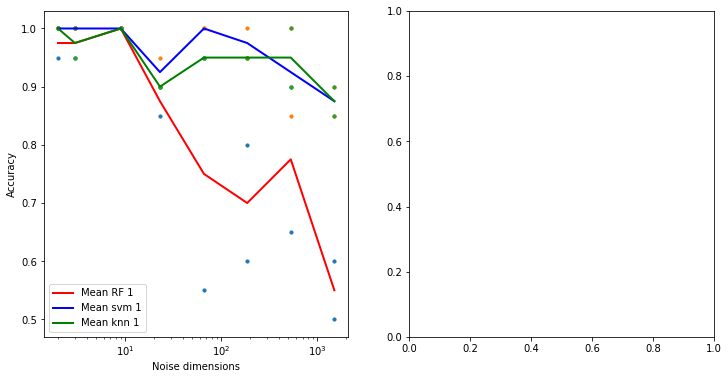

In [16]:

plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.scatter(n_dims+1, rf_acc1_v1, s=10)
plt.plot(noise_dims+1, mean_r_a1_v1, label=f"Mean RF 1", linewidth=2, c='red')
plt.scatter(n_dims+1, svm_acc1_v1, s=10)
plt.plot(noise_dims+1, mean_s_a1_v1, label=f"Mean svm 1", linewidth=2, c='blue')
plt.scatter(n_dims+1, knn_acc1_v1, s=10)
plt.plot(noise_dims+1, mean_k_a1_v1, label=f"Mean knn 1", linewidth=2, c='green')

plt.xscale("log")
plt.xlabel("Noise dimensions")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.scatter(n_dims+1, rf_acc2_v1, s=10)
plt.plot(noise_dims+1,  mean_r_a2_v1, label=f"Mean RF 2", linewidth=2, c='red')
plt.scatter(n_dims+1, svm_acc2_v1, s=10)
plt.plot(noise_dims+1, mean_s_a2_v1, label=f"Mean svm 2", linewidth=2, c='blue')
plt.scatter(n_dims+1, knn_acc2_v1, s=10)
plt.plot(noise_dims+1, mean_k_a2_v1, label=f"Mean knn 2", linewidth=2, c='green')

plt.xscale("log")
plt.xlabel("Noise dimensions")
plt.ylabel("Accuracy")
plt.legend()